In [1]:
import numpy as np
import pandas as pd

In [2]:
DATASET_MATCHES = r"../../dataset/ipl/matches.csv"
DATASET_DELIVEIRES = r"../../dataset/ipl/deliveries.csv"

In [3]:
# reading the `matches` dataset
df_match = pd.read_csv(DATASET_MATCHES)

# printing first 5 lines
df_match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# reading the `delivery` dataset
df_delivery = pd.read_csv(DATASET_DELIVEIRES)

# printing `first 3 rows` and `all columns`
df_delivery.iloc[:3, :]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [5]:
# checking shape of both `df`
df_match.shape, df_delivery.shape

((756, 18), (179078, 21))

In [6]:
# get total score each `inning` in each `match`
df_total_score = df_delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [7]:
df_total_score.head()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


In [8]:
# total score of all `inning == 1`
df_total_score = df_total_score[df_total_score['inning'] == 1]
df_total_score.head()

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157


In [9]:
df_total_score.shape

(756, 3)

Merging `df_total_score` -> `df_match` on `match_id` -> `id`

In [10]:
# features to merge
features = ['match_id', 'total_runs']

# merging
df_match_2 = df_match.merge(df_total_score[features], left_on='id', right_on='match_id')

df_match_2.iloc[:3, :]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183


In [11]:
# unique values from the `team1` column
teams = df_match_2['team1'].unique()
teams

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Replacing `team1` and `team2` values

In [12]:
# replacing `team1` values,
# by using `DataFrame` repalce method

df_match_2 = df_match_2.replace({"team1": {"Delhi Daredevils": "Delhi Capitals", "Deccan Chargers": "Sunrisers Hyderabad"}}, inplace=False)

In [13]:
# replacing `team2` values
# using column (or `Series`) str.replace method

df_match_2['team2'] = df_match_2['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
df_match_2['team2'] = df_match_2['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [14]:
df_match_2 = df_match_2[df_match_2['team1'].isin(teams)]
df_match_2 = df_match_2[df_match_2['team2'].isin(teams)]

In [15]:
df_match_2.shape

(756, 20)

In [16]:
df_match_2 = df_match_2[df_match_2['dl_applied'] == 0]

In [17]:
features = ['match_id', 'city', 'winner', 'total_runs']
df_match_2 = df_match_2[features]

In [18]:
df_match_2.iloc[:3, :]

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
1,2,Pune,Rising Pune Supergiant,184
2,3,Rajkot,Kolkata Knight Riders,183


In [19]:
df_delivery_2 = df_match_2.merge(df_delivery, on="match_id")

In [20]:
df_delivery_2.iloc[:3, :]

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [21]:
df_delivery_2 = df_delivery_2[df_delivery_2['inning'] == 2]

In [22]:
df_delivery_2.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [23]:
# features = ["match_id", 'total_runs_x']
current_score = df_delivery_2.groupby(['match_id'])['total_runs_y'].cumsum()
df_delivery_2['current_score'] = current_score

In [24]:
df_delivery_2['runs_left'] = df_delivery_2['total_runs_x'] - df_delivery_2['current_score']

In [25]:
df_delivery_2['runs_left']

125       206
126       206
127       206
128       204
129       200
         ... 
175865      0
175866     -2
175867     -3
175868     -5
175869     -5
Name: runs_left, Length: 85079, dtype: int64

In [26]:
df_delivery_2['balls_left'] = 126 - (df_delivery_2['over']*6 + df_delivery_2['ball'])

In [27]:
df_delivery_2

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175865,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
175866,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
175867,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
175868,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [28]:
df_delivery_2['player_dismissed'] = df_delivery_2['player_dismissed'].fillna("0")
df_delivery_2['player_dismissed'] = df_delivery_2['player_dismissed'].apply(lambda x: x if x == '0' else '1')
df_delivery_2['player_dismissed'] = df_delivery_2['player_dismissed'].astype(int)
wickets = df_delivery_2.groupby(['match_id'])['player_dismissed'].cumsum().values
df_delivery_2['wickets'] = 10 - wickets
df_delivery_2.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [29]:
df_delivery_2.loc[:, ['player_dismissed']]

,player_dismissed
125,0
126,0
127,0
128,0
129,0
...,...
175865,0
175866,0
175867,1
175868,0


In [30]:
# crr = runs / over
df_delivery_2['crr'] = (df_delivery_2['current_score'] * 6) / (120 - df_delivery_2['balls_left'])

In [31]:
df_delivery_2['rrr'] = (df_delivery_2['runs_left'] * 6) / df_delivery_2['balls_left']

In [39]:
df_delivery_2.iloc[:5, :]

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.0,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.0,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.5,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.4,10.434783


In [32]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [47]:
df_delivery_2['result'] = df_delivery_2.apply(result, axis=1)

In [48]:
df_delivery_2.iloc[:5, :]

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.0,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.0,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.0,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.5,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.4,10.434783,0


In [49]:
df_final = df_delivery_2[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [50]:
df_final = df_final.sample(df_final.shape[0])

In [52]:
df_final.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
151324,Sunrisers Hyderabad,Kings XI Punjab,Mohali,140,72,7,201,7.625,11.666667,0


In [53]:
df_final.dropna(inplace=True)

In [54]:
df_final = df_final[df_final['balls_left'] != 0]

In [55]:
X = df_final.iloc[:, :-1]
y = df_final.iloc[:, -1]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [59]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
55841,Deccan Chargers,Kolkata Knight Riders,Kolkata,77,39,6,163,6.370370,11.846154
70371,Mumbai Indians,Kolkata Knight Riders,Mumbai,104,93,10,147,9.555556,6.709677
86669,Deccan Chargers,Rajasthan Royals,Hyderabad,104,104,10,126,8.250000,6.000000
47477,Royal Challengers Bangalore,Kings XI Punjab,Chandigarh,94,53,8,181,7.791045,10.641509
38277,Royal Challengers Bangalore,Delhi Daredevils,Johannesburg,21,17,7,134,6.582524,7.411765
...,...,...,...,...,...,...,...,...,...
52536,Royal Challengers Bangalore,Mumbai Indians,Bangalore,119,56,6,191,6.750000,12.750000
98088,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,100,69,8,171,8.352941,8.695652
20200,Chennai Super Kings,Delhi Daredevils,Delhi,178,114,10,187,9.000000,9.368421
8445,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,130,61,8,209,8.033898,12.786885


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [66]:
trf = ColumnTransformer(
    [
        ('trf', OneHotEncoder(drop='first', sparse_output=False), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [68]:
pipe = Pipeline(steps=[
    ("step1", trf),
    ('step2', LogisticRegression(solver='liblinear'))
])

In [69]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [70]:
y_pred = pipe.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test, y_pred)

0.8100398975763711

In [76]:
result = pipe.predict_proba(X_test)[10]
result

array([0.62468643, 0.37531357])

In [82]:
np.round(result.T[0]*100)

62.0

In [75]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [83]:
def match_progression(x_df, match_id, pipe):
    mth = x_df[x_df['match_id'] == match_id]
    mth = mth[(mth['ball'] == 6)]
    temp_df = mth[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [84]:
df_temp,target = match_progression(df_delivery_2,74,pipe)
df_temp

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
17122,1,4,0,50.9,49.1
17130,2,8,0,44.8,55.2
17136,3,1,0,52.3,47.7
17142,4,7,1,65.0,35.0
17148,5,12,0,53.5,46.5
17154,6,13,0,40.3,59.7
17160,7,9,0,34.3,65.7
17168,8,15,0,21.3,78.7
17174,9,7,0,19.4,80.6
17181,10,17,0,9.8,90.2


In [85]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Target-178')

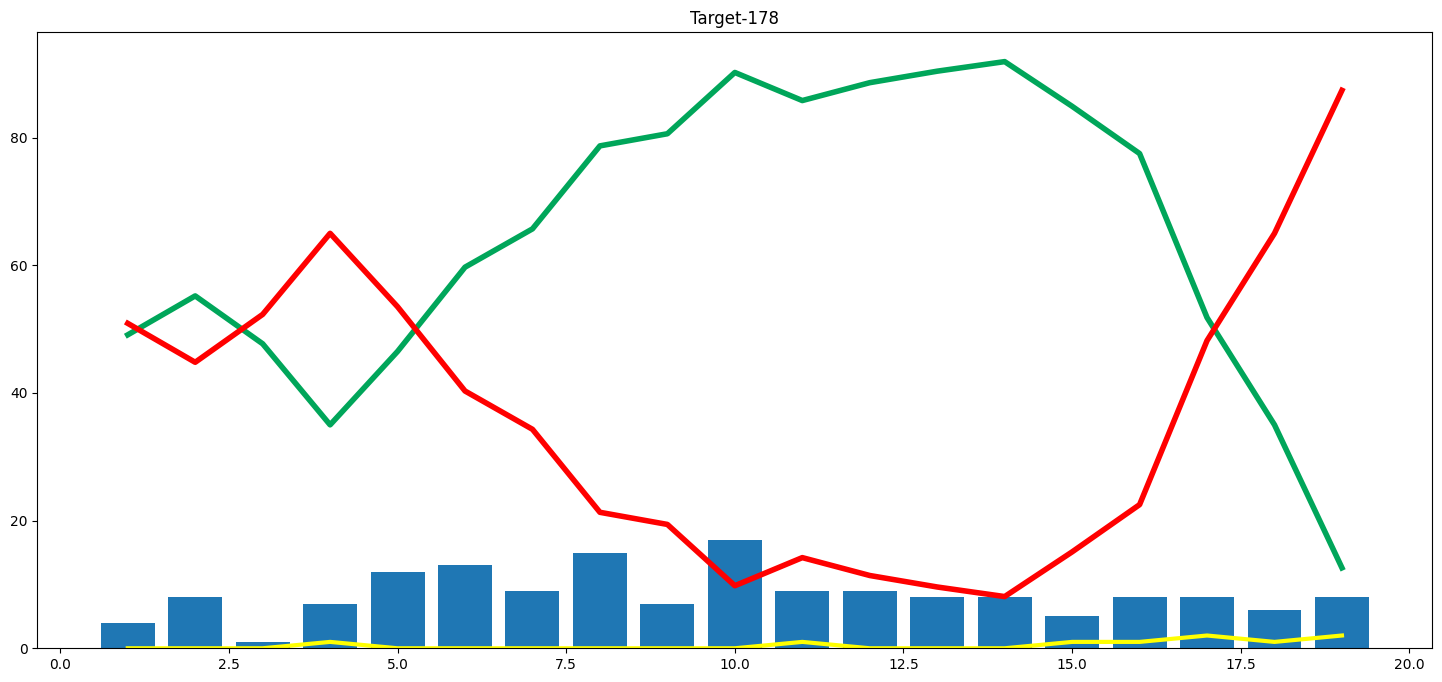

In [87]:
plt.figure(figsize=(18,8))
plt.plot(df_temp['end_of_over'],df_temp['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(df_temp['end_of_over'],df_temp['win'],color='#00a65a',linewidth=4)
plt.plot(df_temp['end_of_over'],df_temp['lose'],color='red',linewidth=4)
plt.bar(df_temp['end_of_over'],df_temp['runs_after_over'])
plt.title('Target-' + str(target))

In [88]:
teams

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [90]:
df_delivery_2['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [91]:
import pickle

In [92]:
pickle.dump(pipe, open("pipe.pkl", 'wb'))

In [33]:
# data = {
#     "A": [1, 2, 3, 4],
#     "B": [3, 5, 2, 4]
# }
# df = pd.DataFrame(data=data)
# print(df)
# print(df.cumsum()['B'])
# df.groupby("A")["A"]